## Demo vẽ bản đồ - đồ án môn cơ sở trí tuệ nhân tạo - ĐH KHTN TPHCM
Trợ giảng: 
- Nguyễn Khánh Toàn - ktoan271199@gmail.com
- Lê Minh Nhật - minhnhatvt2@gmail.com

## Chuẩn bị file input

In [1]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xx        x\n')
    outfile.write('x     x     xxxxxxxxxx\n')
    outfile.write('x x   +xx  xxxx xxx xx\n')
    outfile.write('  x   x x xx   xxxx  x\n')
    outfile.write('x          xx +xx  x x\n')
    outfile.write('xxxxxxx x      xx  x x\n')
    outfile.write('xxxxxxxxx  x x  xx   x\n')
    outfile.write('x          x x Sx x  x\n')
    outfile.write('xxxxx x  x x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

In [2]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('xxx    x  x xxx xx xxx\n')
    outfile.write('x x xxxx xx xx      xx\n')
    outfile.write('x   x       xx xx xx x\n')
    outfile.write('x   x   xxx          x\n')
    outfile.write('x xxxx    x x x x  x x\n')
    outfile.write('x  x x x xx x x x xx x\n')
    outfile.write('xx     x  x   xxx    x\n')
    outfile.write('xx x x x    x     x   \n')
    outfile.write('xxSxxxxxxxxxxxxxxxxxxx')

## Các hàm bổ trợ

In [3]:
import os
import math
import matplotlib.pyplot as plt
from collections import deque

In [4]:
def visualize_maze(matrix, bonus, start, end, route=None):
    """
    Args:
      1. matrix: The matrix read from the input file,
      2. bonus: The array of bonus points,
      3. start, end: The starting and ending points,
      4. route: The route from the starting point to the ending one, defined by an array of (x, y), e.g. route = [(1, 2), (1, 3), (1, 4)]
    """
    #1. Define walls and array of direction based on the route
    walls=[(i,j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j]=='x']
    
    if route:
        direction=[]
        for i in range(1,len(route)):
            if route[i][0]-route[i-1][0]>0:
                direction.append('v') #^
            elif route[i][0]-route[i-1][0]<0:
                direction.append('^') #v        
            elif route[i][1]-route[i-1][1]>0:
                direction.append('>')
            else:
                direction.append('<')

        direction.pop(0)

    #2. Drawing the map
    ax=plt.figure(dpi=120).add_subplot(111)

    for i in ['top','bottom','right','left']:
        ax.spines[i].set_visible(False)

    plt.scatter([i[1] for i in walls],[-i[0] for i in walls],
                marker='X',s=100,color='black')
    
    plt.scatter([i[1] for i in bonus],[-i[0] for i in bonus],
                marker='P',s=100,color='green')

    plt.scatter(start[1],-start[0],marker='*',
                s=100,color='gold')

    if route:
        for i in range(len(route)-2):
            plt.scatter(route[i+1][1],-route[i+1][0],
                        marker=direction[i],color='silver')

    plt.text(end[1],-end[0],'EXIT',color='red',
         horizontalalignment='center',
         verticalalignment='center')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    print(f'Starting point (x, y) = {start[0], start[1]}')
    print(f'Ending point (x, y) = {end[0], end[1]}')
    
    for _, point in enumerate(bonus):
        print(f'Bonus point at position (x, y) = {point[0], point[1]} with point {point[2]}')


In [5]:
def read_file(file_name: str = 'maze.txt'):
    f=open(file_name,'r')
    n_bonus_points = int(next(f)[:-1])
    bonus_points = []
    for i in range(n_bonus_points):
        x, y, reward = map(int, next(f)[:-1].split(' '))
        bonus_points.append((x, y, reward))

    text=f.read()
    matrix=[list(i) for i in text.splitlines()]
    f.close()

    return bonus_points, matrix

## Đọc file và vẽ bản đồ

In [6]:
bonus_points, matrix = read_file('maze_map.txt')

In [7]:
print(f'The height of the matrix: {len(matrix)}')
print(f'The width of the matrix: {len(matrix[0])}')

The height of the matrix: 10
The width of the matrix: 22


In [52]:
import time
a = time.time()
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if matrix[i][j]=='S':
            start=(i,j)

        elif matrix[i][j]==' ':
            if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                end=(i,j)
                
        else:
            pass
b= time.time()
b-a

0.0009996891021728516

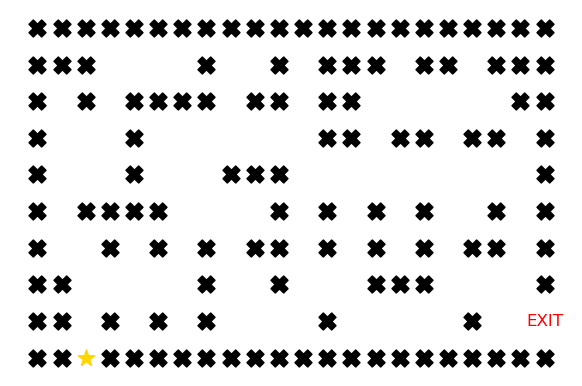

Starting point (x, y) = (9, 2)
Ending point (x, y) = (8, 21)


In [9]:
row = len(matrix)
col = len(matrix[0])
visualize_maze(matrix,bonus_points,start,end)

# Using basic matrix 

### try to DFS -- Status: Complete

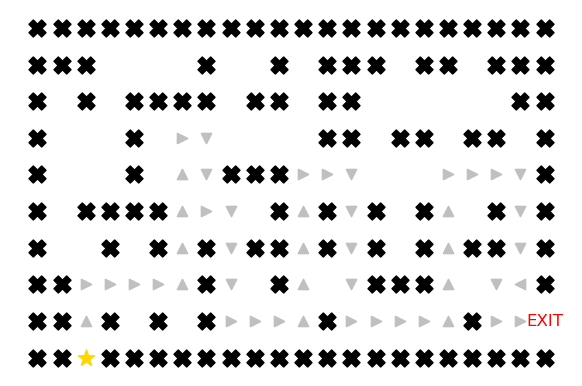

Starting point (x, y) = (9, 2)
Ending point (x, y) = (8, 21)


In [13]:
def dfs_search(matrix, start, end):    
    row = len(matrix)
    col = len(matrix[0])

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    stack = []
    stack.append((x,y))
    dfs = {}
    while end not in stack:

        s = stack[-1]
        if s not in path:
            path.append(s)
        #print(f'Curr: {s}')
        for i in range(4) :
            # using the direction array
            a = s[0] + Dir[i][0]
            b = s[1] + Dir[i][1]

            # not blocked and valid
            if(a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) not in path):
                stack.append((a, b))
                dfs[(a,b)] = s
                break
            if(i == 3 ):
                for j in range(4):
                    a1 = s[0] + Dir[j][0] 
                    b1 = s[1] + Dir[j][1]
                    if (a1,b1) in stack:
                        stack.pop()
                        break
    path.append(end)
    p = {}
    cell = end
    while cell != start:
        p[dfs[cell]] = cell 
        cell = dfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    
    return finalPath
visualize_maze(matrix,bonus_points,start,end, dfs_search(matrix, start, end))

### Try to BFS -- Status: Complete
- Tham khảo: https://www.youtube.com/watch?v=D14YK-0MtcQ -> In đường đi

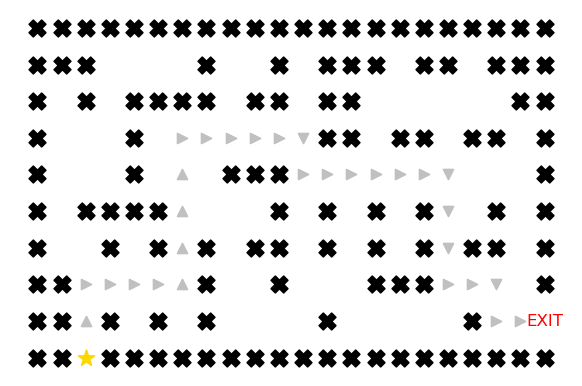

Starting point (x, y) = (9, 2)
Ending point (x, y) = (8, 21)


In [15]:
from collections import deque
def bfs_search(matrix, start, end):
    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]
    
    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    # Mark the source cell as visited
    visited[x][y] = True
    # Tao dictionary luu vi tri diem cha va diem con
    bfs = {}
    # Create a queue for BFS
    q = deque()

    q.append(start) #  Enqueue source cell

    # Do a BFS starting from source cell
    while q:
        curr = q.popleft() # Dequeue the front cell
        #path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break

        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    
        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                visited[a][b] = True
                q.append((a, b))
                bfs[(a,b)] = curr
    p = {}
    cell = end
    while cell != start:
        p[bfs[cell]] = cell 
        cell = bfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    return finalPath
    
visualize_maze(matrix,bonus_points,start,end, bfs_search(matrix, start, end))

## Các hàm heuristic

In [50]:
def Manhattan(cell1, cell2):
    x1, y1 = cell1
    x2, y2 = cell2
    return (abs(x1 - x2) + abs(y1 - y2))
def Euclid(cell1, cell2):
    x1, y1 = cell1
    x2, y2 = cell2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)
def Octile(cell1,cell2):
    dx = abs(cell1[0] - cell2[0])
    dy = abs(cell1[1] - cell2[1])
    return (dx + dy) + (math.sqrt(2)) * min(dx, dy)

### Try to Greedy Best First Search - Status: Complete(using shorted distance)

Length of search: 90
Length of path: 47


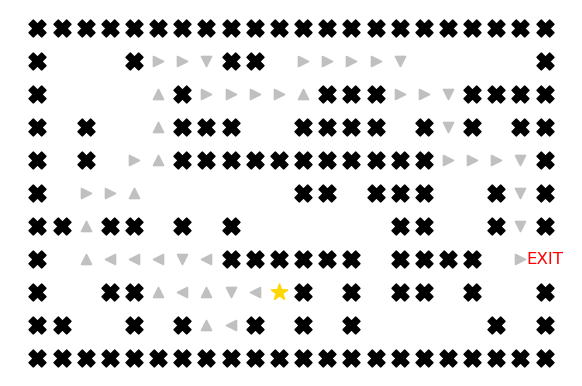

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [51]:
import time
def GBFS_search(matrix, start, end,heuristic): 
    begin = time.time()
    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    # Mark the source cell as visited
    visited[x][y] = True
    greedy = {}
    # Create a queue for BFS
    q = deque()

    q.append(start) #  Enqueue source cell

    # Do a BFS starting from source cell
    while q:
        store_dist = {}
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break
        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                #calculate distance from point current to end
                #dist = Manhattan((a,b),end)
                #dist = Euclid((a,b),end)
                #dist = DiagonalDistance((a,b),end)
                dist = heuristic((a,b),end)
                store_dist[(a, b)] = dist
                greedy[(a,b)] = curr
            #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    #if it doesn't quit traverse path to find a new way :v
                    for point in reversed(path):
                        for i in range(4):
                            a = point[0] + Dir[i][0]
                            b = point[1] + Dir[i][1]
                            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                                #dist = Manhattan((a,b),end)
                                #dist = Euclid((a,b),end)
                                #dist = DiagonalDistance((a,b),end)
                                dist = heuristic((a,b),end)
                                store_dist[(a, b)] = dist  
                                break
                #print(store_dist)
                store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
                for key, val in store_dist.items():
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    break
    p = {}
    cell = end
    while cell != start:
        p[greedy[cell]] = cell 
        cell = greedy[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    close = time.time()

    return [len(greedy.keys()),finalPath,(close-begin)*1000]

len1_search = GBFS_search(matrix, start, end,Manhattan)[0]
len2_search = GBFS_search(matrix, start, end,Euclid)[0]
len3_search = GBFS_search(matrix, start, end,Octile)[0]

len1_path = len(GBFS_search(matrix, start, end,Manhattan)[1])
len2_path = len(GBFS_search(matrix, start, end,Euclid)[1])
len3_path = len(GBFS_search(matrix, start, end,Octile)[1])

time1 = GBFS_search(matrix, start, end,Manhattan)[2]
time2 = GBFS_search(matrix, start, end,Euclid)[2]
time3 = GBFS_search(matrix, start, end,Octile)[2]
print(f'''\tSearch path Length of:
Manhattan: {len1_search}
Euclid: {len2_search}
Octile: {len3_search}''')
print(f'''\tFinal path Length of:
Manhattan: {len1_path}
Euclid: {len2_path}
Octile: {len3_path}''')
print(f'''\tRuntime (ms) of:
Manhattan: {time1}
Euclid: {time2}
Octile: {time3}''')
visualize_maze(matrix,bonus_points,start,end, GBFS_search(matrix, start, end,Manhattan)[1])
visualize_maze(matrix,bonus_points,start,end, GBFS_search(matrix, start, end,Euclid)[1])
visualize_maze(matrix,bonus_points,start,end, GBFS_search(matrix, start, end,Octile)[1])

In [226]:
a = deque()
a.append((1,2))

### Try to A* - Status: Complete

Length of search: 43
Length of path: 31


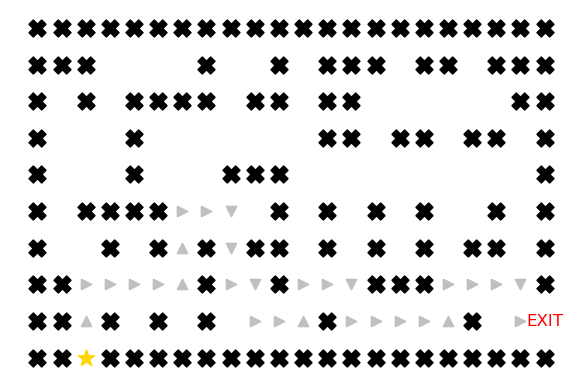

Starting point (x, y) = (9, 2)
Ending point (x, y) = (8, 21)


In [297]:
def Astar_search(matrix, start, end): 
    row = len(matrix)
    col = len(matrix[0])
    
    real_distance = 0
    visited = [[False for i in range(col)]for j in range(row)]

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    aStar = {}
    # Mark the source cell as visited
    visited[x][y] = True

    # Create a queue for BFS
    q = deque()
    
    q.append(start) #  Enqueue source cell

    # Do a BFS starting from source cell
    while q:
        store_dist = {}
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break

        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                #calculate distance from point current to end
                dist = math.sqrt((a-end[0])**2 + (b-end[1])**2) + 1
                store_dist[(a, b)] = dist
                aStar[(a,b)] = curr
            #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    #if it doesn't quit traverse path to find a new way :v
                    for point in reversed(path):
                        for i in range(4):
                            a = point[0] + Dir[i][0]
                            b = point[1] + Dir[i][1]
                            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                                dist = math.sqrt((a-end[0])**2 + (b-end[1])**2) + 1
                                store_dist[(a, b)] = dist
                                break
                store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
                for key, val in store_dist.items():
                    real_distance += val
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    break
    p = {}
    cell = end
    while cell != start:
        p[aStar[cell]] = cell 
        cell = aStar[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    print(f'Length of search: {len(aStar.keys())}')
    print(f'Length of path: {len(finalPath)}')
    return finalPath
visualize_maze(matrix,bonus_points,start,end, Astar_search(matrix, start, end))

# Using bonus point matrix

In [27]:
# with open('maze_map(bonus).txt', 'w') as outfile:
#     outfile.write('3\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
#     outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
#     outfile.write('x   x   xx xx        x\n')
#     outfile.write('x     x     xxxxxxxxxx\n')
#     outfile.write('x x   +xx  xxxx xxx xx\n')
#     outfile.write('  x   x x xx   xxxx  x\n')
#     outfile.write('x       S  xx +xx  x x\n')
#     outfile.write('xxxxxxx x      xx  x x\n')
#     outfile.write('xxxxxxxxx  x x  xx   x\n')
#     outfile.write('x          x x  x x  x\n')
#     outfile.write('xxxxx x  x x x     x x\n')
#     outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

In [131]:
#map 5
with open('maze_map(bonus).txt', 'w') as outfile:
    outfile.write('2\n')
    outfile.write('2 7 -1\n')
    outfile.write('5 14 -4\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('xSx xxxxxxx       x  x\n')
    outfile.write('x  x   +     xxx     x\n')
    outfile.write('x   xx x  x   x   x  x\n')
    outfile.write('x        xx  xxx     x\n')
    outfile.write('x     xxx  xx +  xxxxx\n')
    outfile.write('x  xxxxx  x xxxx     x\n')
    outfile.write('x   x     x      xxxxx\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx      \n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

In [132]:
bonus_points, matrix = read_file('maze_map(bonus).txt')

In [133]:
print(f'The height of the matrix: {len(matrix)}')
print(f'The width of the matrix: {len(matrix[0])}')

The height of the matrix: 11
The width of the matrix: 22


In [134]:
for i in range(len(matrix)):
    for j in range(len(matrix[0])):
        if matrix[i][j]=='S':
            start=(i,j)

        elif matrix[i][j]==' ':
            if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                end=(i,j)
                
        else:
            pass

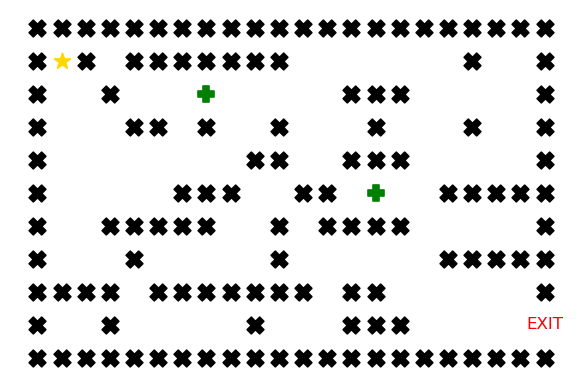

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)
Bonus point at position (x, y) = (2, 7) with point -1
Bonus point at position (x, y) = (5, 14) with point -4


In [135]:
visualize_maze(matrix, bonus_points, start, end)

In [136]:
def init_weights(matrix):
    weights = [[1 for i in range(col)]for j in range(row)]
    for k in bonus_points:
        weights[k[0]][k[1]] = k[2]
    return weights
weights = init_weights(matrix)

In [137]:
start

(1, 1)

{(2, 7): -1, (5, 14): -4}

### Try to DFS - Status:
Ưu tiên chọn đường đi có trọng số nhỏ nhất

In [163]:
bonus_points

[(3, 6, -3), (5, 14, -1), (6, 14, -1)]

## Try to BFS - Status:
Ưu tiên đỉnh có trọng số nhỏ nhất


## Sửa code GBFS có điểm thưởng : 

(1, 1)
{(2, 1): 22.18962010041709}

(2, 1)
{(2, 2): 21.248456731316587, (3, 1): 21.8806130178211}

(2, 2)
{(3, 2): 20.924858845171276}

(3, 2)
{(3, 3): 19.973665961010276, (4, 2): 20.6468827043885, (3, 1): 21.8806130178211}

(3, 3)
{(4, 3): 19.681541692269406}

(4, 3)
{(4, 4): 18.72004514666935, (5, 3): 19.439088914585774, (4, 2): 20.6468827043885}

(4, 4)
{(4, 5): 17.76305461424021, (5, 4): 18.46424919657298}

(4, 5)
{(4, 6): 16.811388300841898, (5, 5): 17.492422502470642}

(4, 6)
{(4, 7): 15.866068747318506, (3, 6): 17.15549442140351}

(4, 7)
{(4, 8): 14.92838827718412}

(4, 8)
{(3, 8): 15.317821063276353}

(3, 8)
{(3, 9): 14.416407864998739, (2, 8): 15.7648230602334}

(3, 9)
{(2, 9): 14.892443989449804}

(2, 9)
{(2, 10): 14.038404810405298, (2, 8): 15.7648230602334}

(2, 10)
{(2, 11): 13.206555615733702}

(2, 11)
{(2, 12): 12.40175425099138, (3, 11): 12.661903789690601, (1, 11): 13.806248474865697}

(2, 12)
{(3, 12): 11.816653826391969, (1, 12): 13.041594578792296}

(3, 12)
{(3, 13)

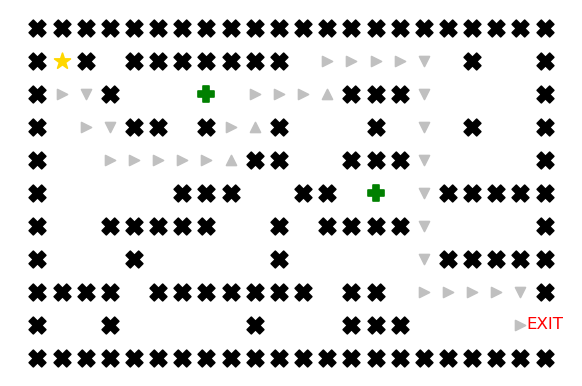

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)
Bonus point at position (x, y) = (2, 7) with point -1
Bonus point at position (x, y) = (5, 14) with point -4


In [140]:
row = len(matrix)
col = len(matrix[0])

visited = [[False for i in range(col)]for j in range(row)]

# start = (5, 6)
x = start[0]
y = start[1]


Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
bfs = {}
bfs_length = {}
path = []
# Mark the source cell as visited
visited[x][y] = True
     
# Create a queue for BFS
q = deque()
     
q.append(start) #  Enqueue source cell
     
# Do a BFS starting from source cell
while q:
    store_dist = {}
    curr = q.popleft() # Dequeue the front cell
    path.append(curr)
    # If we have reached the destination cell,
    # we are done
    if curr[0] == end[0] and curr[1] == end[1]:
        break
    print(curr)
    # Otherwise enqueue its adjacent cells
    for i in range(4):
        a = curr[0] + Dir[i][0]
        b = curr[1] + Dir[i][1]    
        
    # if adjacent cell is valid, has path 
    # and not visited yet, enqueue it.
        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
            dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
            store_dist[(a, b)] = weights[a][b] + dist
            bfs[(a, b)] = curr
            if euclid(curr,((a,b))) >=1:
                len1 = len(bfs_search(matrix,curr,(a,b))) - weights[
                len2 = len(bfs_search(matrix,x,end))
                if len1 + len2 <= len(bfs_search(matrix,curr,end)):
                    print('Bonus!!')
            #select point based on distance array
        if i == 3:
            if store_dist == {}:
                #if it doesn't quit traverse path to find a new way :v
                for point in reversed(path):
                    for i in range(4):
                        a = point[0] + Dir[i][0]
                        b = point[1] + Dir[i][1]
                        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                            dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
                            store_dist[(a, b)] = weights[a][b] + dist
            
            store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
            print(store_dist)
            if len(store_dist.values()) > 1 and len(set(store_dist.values())) == 1:
                for key, val in store_dist.items():
                    bfs_length[key] = len(bfs_search(matrix,key,end))
                bfs_length = dict(sorted(bfs_length.items(), key=lambda item: item[1]))
                print('Bfs: ')
                print(bfs_length)
                for k,length in bfs_length.items():
                    visited[k[0]][k[1]] = True
                    q.append(k)
                    break
            else:
                for key, val in store_dist.items():
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    break
            print()
p = {}
cell = end
while cell != start:
    p[bfs[cell]] = cell 
    cell = bfs[cell]
final = list(p.values())
final.append(start)
finalPath = final[::-1]
visualize_maze(matrix,bonus_points,start,end, finalPath)

In [72]:
a = {(6, 18): 5.242640687119285}
len(a.values())

1

## Try to A* - Status: 

### Sửa đổi trọng số

{(2, 5): 2, (3, 4): 2, (4, 5): 2}
[(3, 5)]
{(1, 5): 2, (2, 4): 2}
[(3, 5), (2, 5)]
{(1, 6): 2}
[(3, 5), (2, 5), (1, 5)]
{(1, 7): 2}
[(3, 5), (2, 5), (1, 5), (1, 6)]
{(2, 7): 2}
[(3, 5), (2, 5), (1, 5), (1, 6), (1, 7)]
{(2, 8): 2}
[(3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7)]
{(2, 9): 2}
[(3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8)]
{(3, 9): 2, (2, 10): 2}
[(3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (2, 9)]
{(3, 10): 2}
[(3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (2, 9), (3, 9)]
{(2, 10): 2}
[(3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (2, 9), (3, 9), (3, 10)]
{(1, 10): 2, (2, 11): 2}
[(3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (2, 9), (3, 9), (3, 10), (2, 10)]
{(1, 11): 2}
[(3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (2, 9), (3, 9), (3, 10), (2, 10), (1, 10)]
{(2, 11): 2, (1, 12): 2}
[(3, 5), (2, 5), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (2, 9), (3, 9), (3, 10), (2, 10), (1, 10), (1, 11)]
{}
[(3, 5), (2, 5),

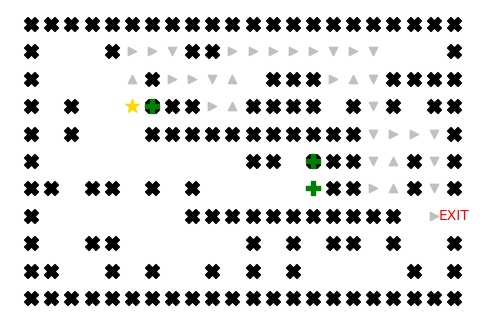

Starting point (x, y) = (3, 5)
Ending point (x, y) = (7, 21)
Bonus point at position (x, y) = (3, 6) with point -3
Bonus point at position (x, y) = (5, 14) with point -1
Bonus point at position (x, y) = (6, 14) with point -1


In [129]:
row = len(matrix)
col = len(matrix[0])

visited = [[False for i in range(col)]for j in range(row)]

x = start[0]
y = start[1]

Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
bfs = {}
path = []
# Mark the source cell as visited
visited[x][y] = True
     
# Create a queue for BFS
q = deque()
     
q.append(start) #  Enqueue source cell
     
# Do a BFS starting from source cell
while q:
    store_dist = {}
    curr = q.popleft() # Dequeue the front cell
    path.append(curr)
    # If we have reached the destination cell,
    # we are done
    if curr[0] == end[0] and curr[1] == end[1]:
        break
    
    # Otherwise enqueue its adjacent cells
    for i in range(4):
        a = curr[0] + Dir[i][0]
        b = curr[1] + Dir[i][1]    
        
    # if adjacent cell is valid, has path 
    # and not visited yet, enqueue it.
        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
            store_dist[(a, b)] = weights[a][b] + weights[curr[0]][curr[1]]
            bfs[(a, b)] = curr
            #select point based on distance array
        if i == 3:
            print(store_dist)
            if store_dist == {}:
                #if it doesn't quit traverse path to find a new way :v
                for point in reversed(path):
                    for i in range(4):
                        a = point[0] + Dir[i][0]
                        b = point[1] + Dir[i][1]
                        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                            store_dist[(a, b)] = weights[a][b] + weights[curr[0]][curr[1]]
                            bfs[(a, b)] = point
                            break
                
            store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
            for key, val in store_dist.items():
                visited[key[0]][key[1]] = True
                q.append(key)
                break
    print(path)
p = {}
cell = end
while cell != start:
    p[bfs[cell]] = cell 
    cell = bfs[cell]
final = list(p.values())
final.append(start)
finalPath = final[::-1]
visualize_maze(matrix,bonus_points,start,end, finalPath)

## Create file 5 for basic matrix

In [28]:
def get_infor_from_matrix(matrix='maze_map.txt'):
    bonus_points, matrix = read_file('maze_map.txt')
    start = 0
    end = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j]=='S':
                start=(i,j)

            elif matrix[i][j]==' ':
                if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                    end=(i,j)

            else:
                pass
    return [bonus_points, matrix, start, end]

In [29]:
#map 1
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xx        xx  xxx     xx\n')
    outfile.write('x     x     xxxxxx    xxx        xx\n')
    outfile.write('x x   +xx  xxxx xxx x           xxx\n')
    outfile.write('  x   x x xx   xxxx  xx x     xxxxx\n')
    outfile.write('x          xx +xx  x x xxxxxxxxxxxx\n')
    outfile.write('xxxxxxx x      xx  x xxxxx      xxx\n')
    outfile.write('xxxxxxxxx  x x  xx   xxx          x\n')
    outfile.write('x          x x  x x  xxxxxxxxxxxxxx\n')
    outfile.write('xxxxx x  x x x     x xxxxxxxxxxxxxx\n')
    outfile.write('xxxxxxxxxxxxxxxx               xxxx\n')
    outfile.write('xx     xxxx            xxxxx     xx\n')
    outfile.write('xxxx      xxxxxxxxxxxxxxxxx      xx\n')
    outfile.write('xS                     xxx     xxxx\n')
    outfile.write('xxxxxxx            xx      xxxxxxxx\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

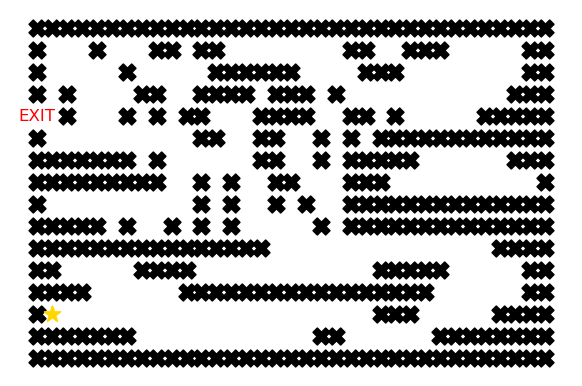

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [30]:
matrix_1 = get_infor_from_matrix('maze_map.txt')
matrix = matrix_1[1]
start = matrix_1[2]
end = matrix_1[3]
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3])

In [168]:
print(f'The height of the matrix: {len(matrix_1[1])}')
print(f'The width of the matrix: {len(matrix_1[1][0])}')

The height of the matrix: 16
The width of the matrix: 35


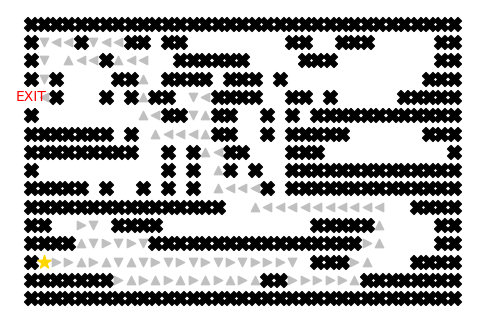

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [92]:
# using dfs 
path = dfs_search(matrix, start, end)
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3], path)

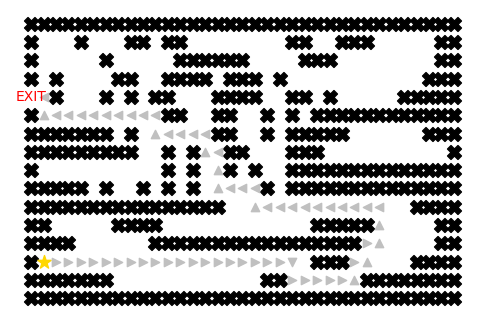

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [93]:
# using bfs
path = bfs_search(matrix, start, end)
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3], path)

Length of search: 169
Length of path: 97


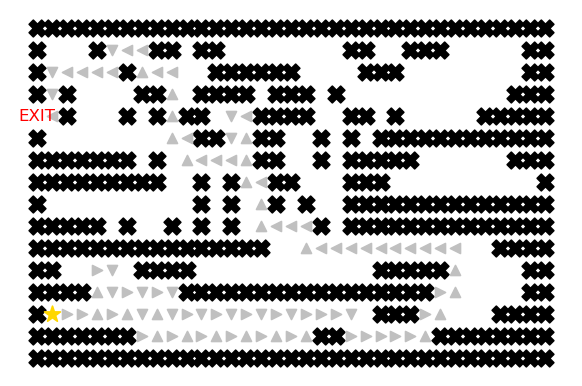

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [266]:
# using GBFS Huy
path = GBFS_search_Huy(matrix, start, end)
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3], path)

Length of search: 169
Length of path: 97


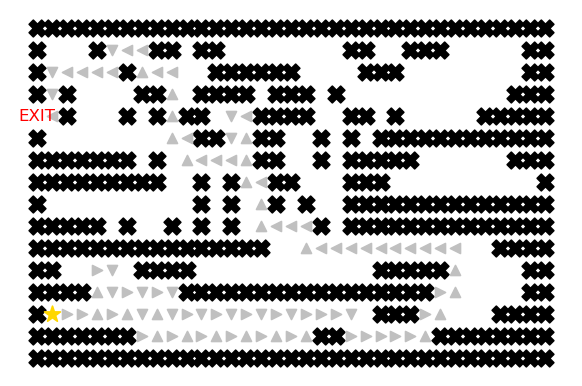

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [267]:
# using GBFS Duy
path = GBFS_search_Duy(matrix, start, end)
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3], path)

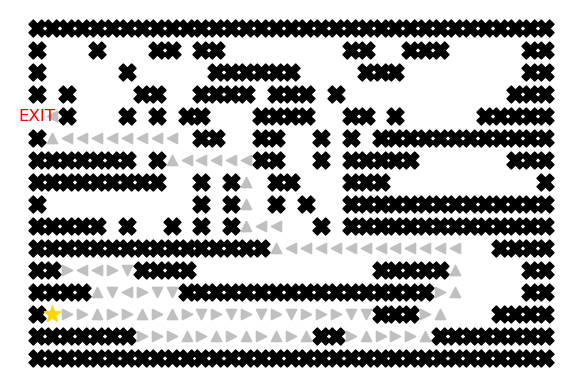

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [177]:
# using A*
path = Astar_search(matrix, start, end)
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3], path)

In [34]:
#map 2
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx           x\n')
    outfile.write('x     x     xxx   xxxx\n')
    outfile.write('x x   xxx  xxxx x x xx\n')
    outfile.write('x x   xxxxxxxxxxx    x\n')
    outfile.write('x          xx xxx  x x\n')
    outfile.write('xx xx x x      xx  x x\n')
    outfile.write('x       xxxxxx xxxx   \n')
    outfile.write('x  xx     Sx x xx x  x\n')
    outfile.write('xx  x x  x x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

refactor function get information from matrix

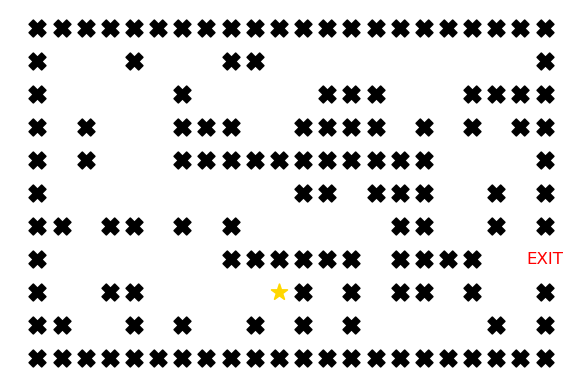

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [35]:
matrix_2 = get_infor_from_matrix('maze_map.txt')
matrix = matrix_2[1]
start = matrix_2[2]
end = matrix_2[3]
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3])

45


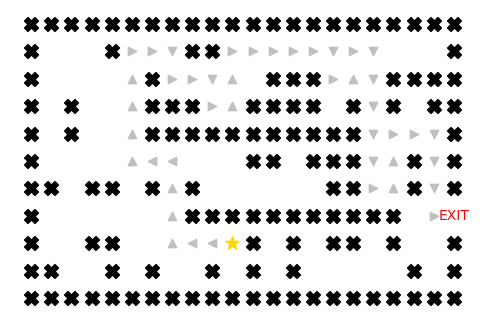

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [98]:
# using dfs 
path = dfs_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3], path)

37


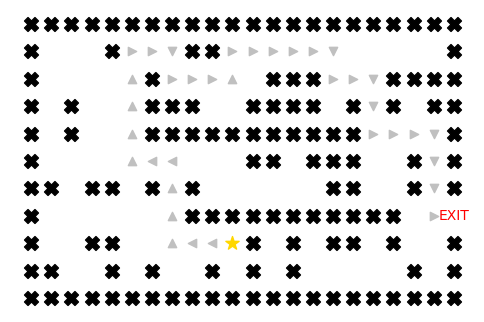

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [99]:
# using bfs
path = bfs_search(matrix, start, end)
print(len(path))
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3], path)

Length of search: 82
Length of path: 49


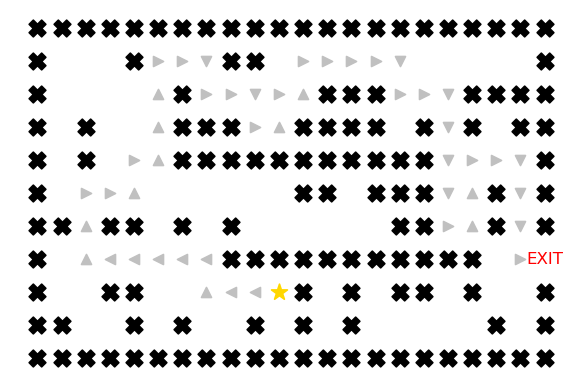

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [270]:
# using GBFS_Huy
path = GBFS_search_Huy(matrix, start, end)
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3], path)

Length of search: 82
Length of path: 49


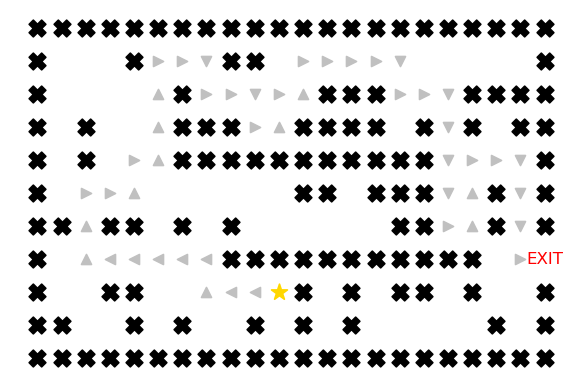

Starting point (x, y) = (8, 10)
Ending point (x, y) = (7, 21)


In [271]:
# using GBFS_Duy
path = GBFS_search_Duy(matrix, start, end)
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3], path)

In [ ]:
# using A*
path = Astar_search(matrix, start, end)
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3], path)

In [272]:
#map 3
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx          Sx\n')
    outfile.write('x   x x  x  xxx   xxxx\n')
    outfile.write('x   x     x          x\n')
    outfile.write('x   x    x           x\n')
    outfile.write('x   x      xx xxx  x x\n')
    outfile.write('xx xxxxxx      xx  x x\n')
    outfile.write('   x    xx   xxx  x  x\n')
    outfile.write('x       x    xxx     x\n')
    outfile.write('xx  x x    x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

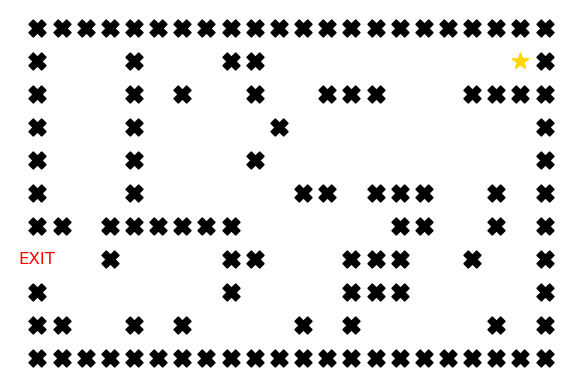

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)


In [273]:
matrix_3 = get_infor_from_matrix('maze_map.txt')
matrix = matrix_3[1]
start = matrix_3[2]
end = matrix_3[3]
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3])

In [ ]:
# using dfs 
path = dfs_search(matrix, start, end)
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3], path)

In [ ]:
# using bfs
path = bfs_search(matrix, start, end)
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3], path)

Length of search: 70
Length of path: 37


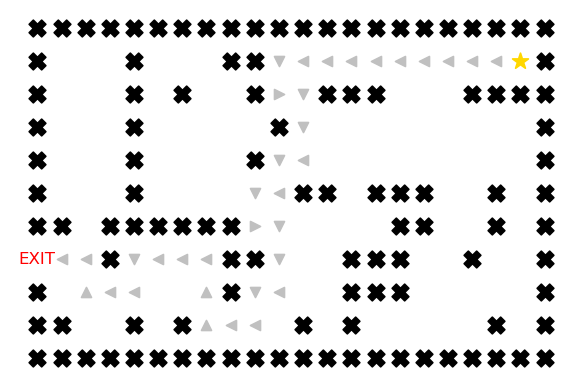

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)


In [274]:
# using GBFS_Huy
path = GBFS_search_Huy(matrix, start, end)
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3], path)

Length of search: 70
Length of path: 37


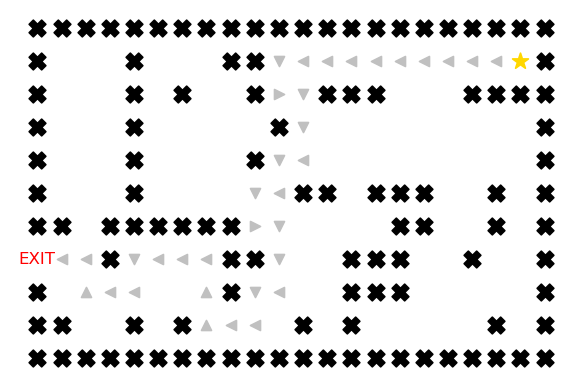

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)


In [275]:
# using GBFS_Duy
path = GBFS_search_Duy(matrix, start, end)
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3], path)

In [ ]:
# using A*
path = Astar_search(matrix, start, end)
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3], path)

In [276]:
#map 4
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x x Sxxxxxx       x  x\n')
    outfile.write('x  x         xxx     x\n')
    outfile.write('x   x xx  x   x   x  x\n')
    outfile.write('x    x   x   xxx     x\n')
    outfile.write('x     x x  xx    xxxxx\n')
    outfile.write('x  x x x  x xxxx     x\n')
    outfile.write('x   x     x          x\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx     x\n')
    outfile.write('xxxxxxxxxx xxxxxxxxxxx')

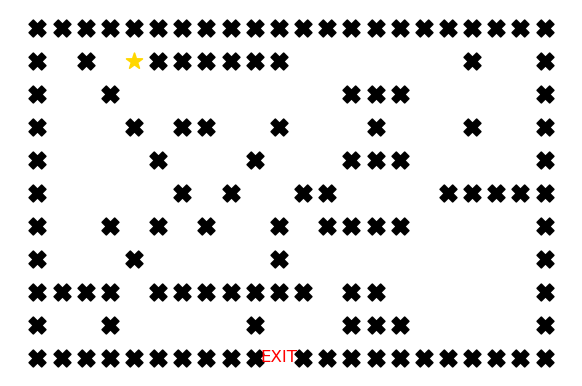

Starting point (x, y) = (1, 4)
Ending point (x, y) = (10, 10)


In [277]:
matrix_4 = get_infor_from_matrix('maze_map.txt')
matrix = matrix_4[1]
start = matrix_4[2]
end = matrix_4[3]
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3])

In [ ]:
# using dfs 
path = dfs_search(matrix, start, end)
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3], path)

In [ ]:
# using bfs
path = bfs_search(matrix, start, end)
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3], path)

Length of search: 68
Length of path: 36


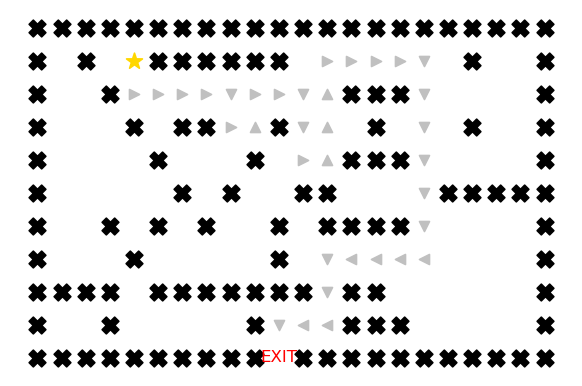

Starting point (x, y) = (1, 4)
Ending point (x, y) = (10, 10)


In [278]:
# using GBFS_Huy
path = GBFS_search_Huy(matrix, start, end)
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3], path)

Length of search: 68
Length of path: 36


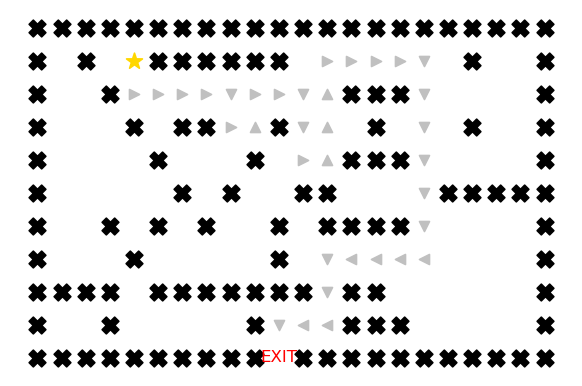

Starting point (x, y) = (1, 4)
Ending point (x, y) = (10, 10)


In [279]:
# using GBFS_Duy
path = GBFS_search_Duy(matrix, start, end)
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3], path)

In [ ]:
# using A*
path = Astar_search(matrix, start, end)
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3], path)

In [255]:
#map 5
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('xSx xxxxxxx       x  x\n')
    outfile.write('x  x         xxx     x\n')
    outfile.write('x   xx x  x   x   x  x\n')
    outfile.write('x        xx  xxx     x\n')
    outfile.write('x     xxx  xx    xxxxx\n')
    outfile.write('x  xxxxx  x xxxx     x\n')
    outfile.write('x   x     x      xxxxx\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx      \n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')

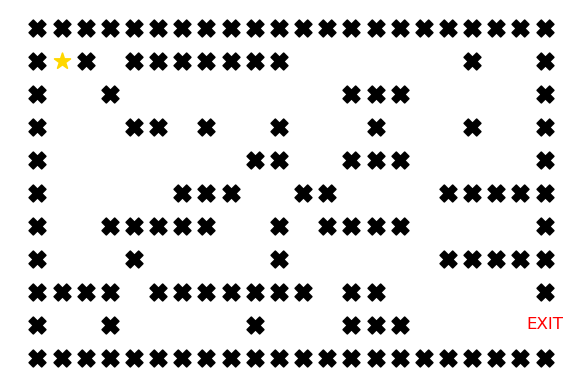

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)


In [256]:
matrix_5 = get_infor_from_matrix('maze_map.txt')
matrix = matrix_5[1]
start = matrix_5[2]
end = matrix_5[3]
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3])

In [ ]:
# using dfs 
path = dfs_search(matrix, start, end)
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3], path)

In [ ]:
# using bfs
path = bfs_search(matrix, start, end)
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3], path)

Length of search: 63
Length of path: 35


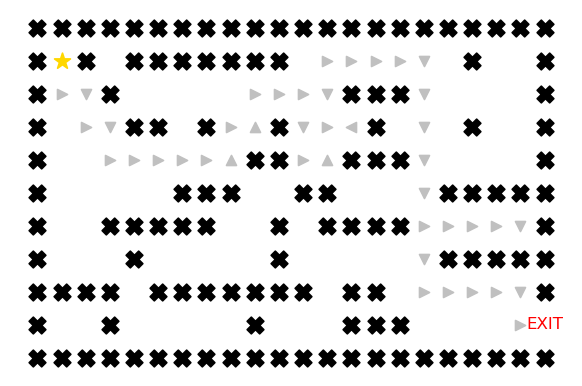

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)


In [194]:
# using GBFS_Huy
path = GBFS_search_Huy(matrix, start, end)
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3], path)

In [195]:
# using GBFS_Duy
path = GBFS_search_Duy(matrix, start, end)
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3], path)

KeyError: (1, 1)

In [ ]:
# using A*
path = Astar_search(matrix, start, end)
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3], path)